# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=bafeade0ff663cdd6e29b550282e18c3"  # Replace with your provided OpenWeatherMap API key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Make an API request
        response = requests.get(city_url)
        
        # Check if the API request was successful
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print("City not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | goundi
Processing Record 4 of Set 1 | sinabang
Processing Record 5 of Set 1 | nambucca heads
Processing Record 6 of Set 1 | buta
Processing Record 7 of Set 1 | kidal
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | worgl
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | kalabo
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | visby
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | mountain home
Processing Record 17 of Set 1 | inhambane
Processing Record 18 of Set 1 | rongelap
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | bulung'ur shahri
City not found. Skipping...
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | adamstown


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,286.38,71,5,0.89,NZ,1698615682
1,qaqortoq,60.7167,-46.0333,277.93,64,100,5.62,GL,1698615509
2,goundi,9.3627,17.3660,296.80,81,34,2.12,TD,1698615683
3,sinabang,2.4803,96.3801,298.57,84,100,0.99,ID,1698615531
4,nambucca heads,-30.6500,153.0000,294.26,67,5,1.66,AU,1698615683


In [7]:
import os

# Create the "output_data" directory if it doesn't exist
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV in the "output_data" directory
city_data_df.to_csv(f"{output_directory}/cities.csv", index_label="City_ID")


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,286.38,71,5,0.89,NZ,1698615682
1,qaqortoq,60.7167,-46.0333,277.93,64,100,5.62,GL,1698615509
2,goundi,9.3627,17.3660,296.80,81,34,2.12,TD,1698615683
3,sinabang,2.4803,96.3801,298.57,84,100,0.99,ID,1698615531
4,nambucca heads,-30.6500,153.0000,294.26,67,5,1.66,AU,1698615683


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

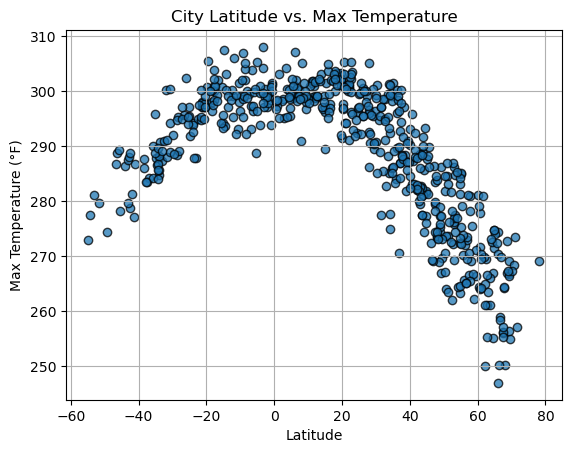

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

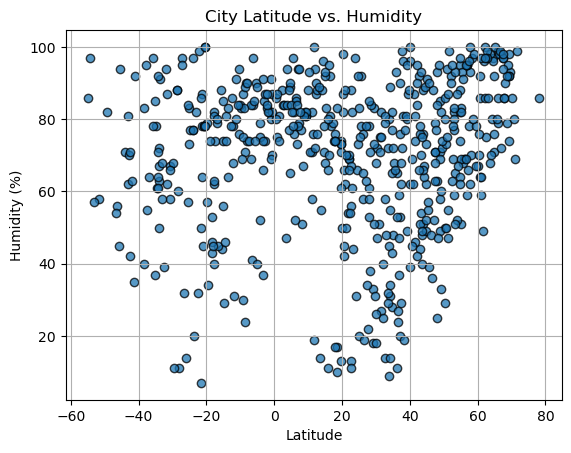

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

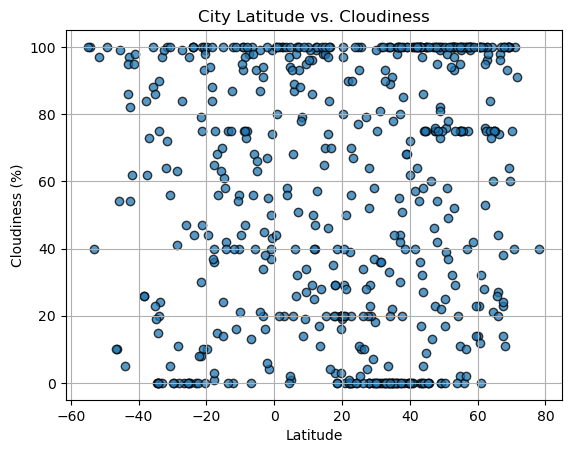

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

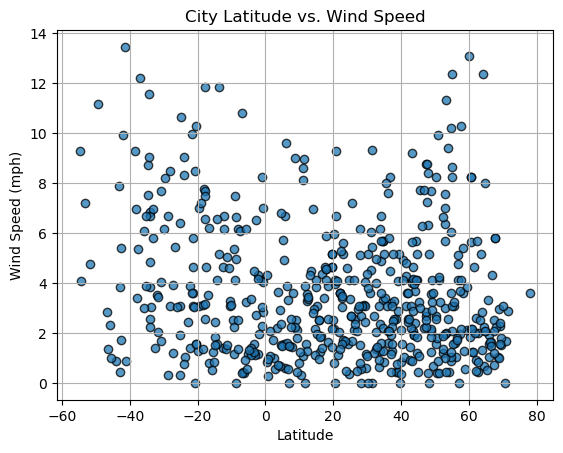

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
from scipy.stats import linregress

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression values
    regress_values = x_values * slope + intercept

    # Create the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create a scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Label the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,277.93,64,100,5.62,GL,1698615509
2,goundi,9.3627,17.3660,296.80,81,34,2.12,TD,1698615683
3,sinabang,2.4803,96.3801,298.57,84,100,0.99,ID,1698615531
5,buta,2.7858,24.7300,295.05,84,20,0.55,CD,1698615683
6,kidal,18.4411,1.4078,302.62,10,0,3.87,ML,1698615684


In [17]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,286.38,71,5,0.89,NZ,1698615682
4,nambucca heads,-30.6500,153.0000,294.26,67,5,1.66,AU,1698615683
9,grytviken,-54.2811,-36.5092,277.55,97,100,4.07,GS,1698615684
10,kalabo,-14.9700,22.6814,294.18,74,24,1.84,ZM,1698615684
11,edinburgh of the seven seas,-37.0676,-12.3116,284.13,64,73,12.19,SH,1698615684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7559364389838346


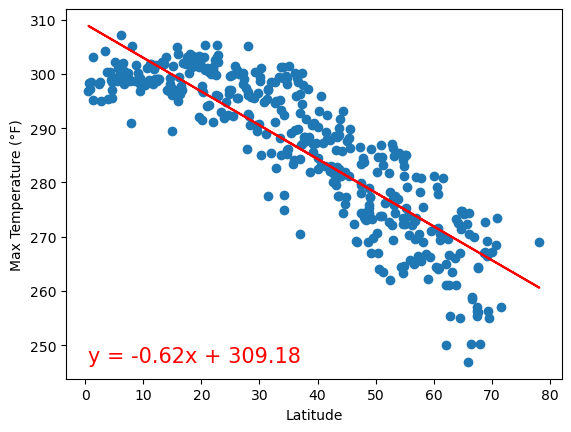

In [31]:
# Perform linear regression for the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Print the equation on the graph within the plot area
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].min(), line_eq, fontsize=15, color="red")

# Calculate and display the r-squared value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")

# Show the plot
plt.show()


The r-value is: 0.6318606479645582


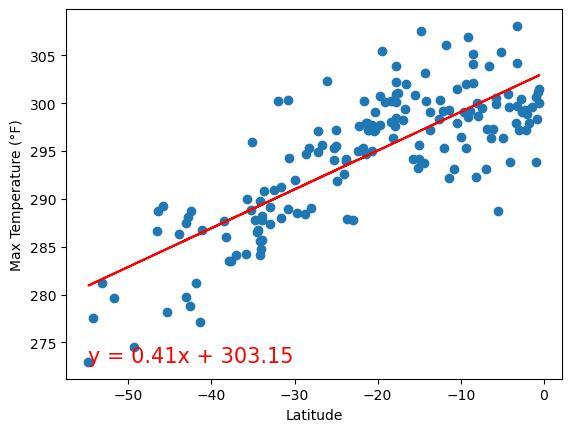

In [29]:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Print the equation on the graph within the plot area
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Max Temp"].min(), line_eq, fontsize=15, color="red")

# Calculate and display the r-squared value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

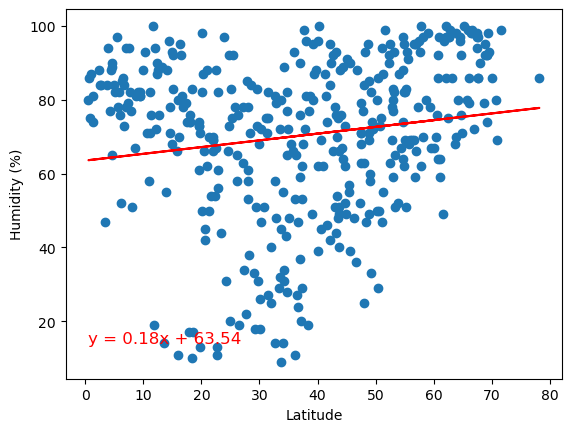

The r-value is: 0.025524453466694817


In [35]:
# Perform linear regression for Humidity vs. Latitude in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the equation on the graph within the plot area
equation_text = f"{line_eq}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Humidity"].min() + 5, equation_text, fontsize=12, color="red")

# Show the plot
plt.show()

# Output the r-value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")



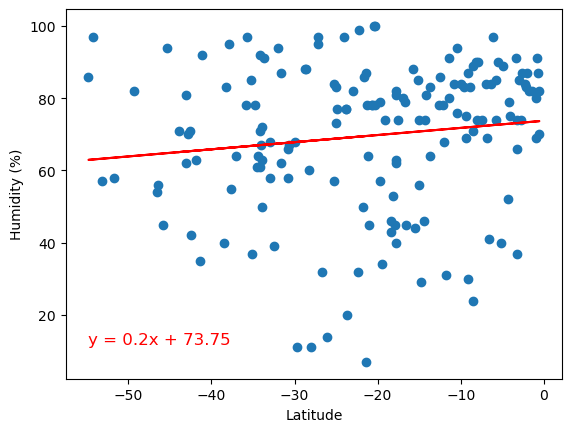

The r-value is: 0.017518538031839823


In [36]:
# Perform linear regression for Humidity vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the equation on the graph within the plot area
equation_text = f"{line_eq}"
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Humidity"].min() + 5, equation_text, fontsize=12, color="red")

# Show the plot
plt.show()

# Output the r-value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

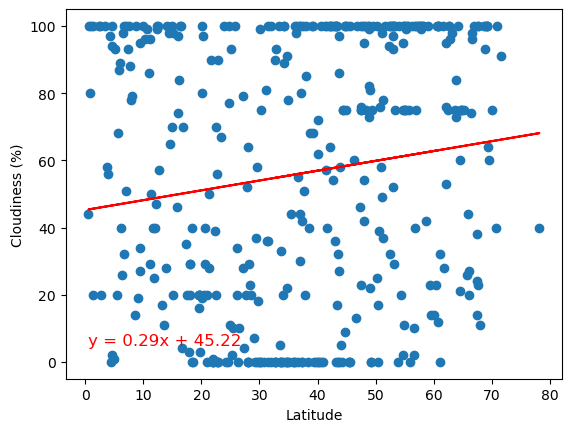

The r-value is: 0.02057603840820473


In [37]:
# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the equation on the graph within the plot area
equation_text = f"{line_eq}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Cloudiness"].min() + 5, equation_text, fontsize=12, color="red")

# Show the plot
plt.show()

# Output the r-value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")


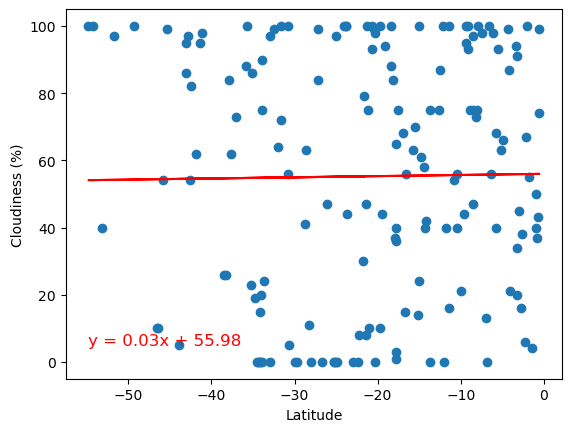

The r-value is: 0.00016928217763324157


In [38]:
# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the equation on the graph within the plot area
equation_text = f"{line_eq}"
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].min() + 5, equation_text, fontsize=12, color="red")

# Show the plot
plt.show()

# Output the r-value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

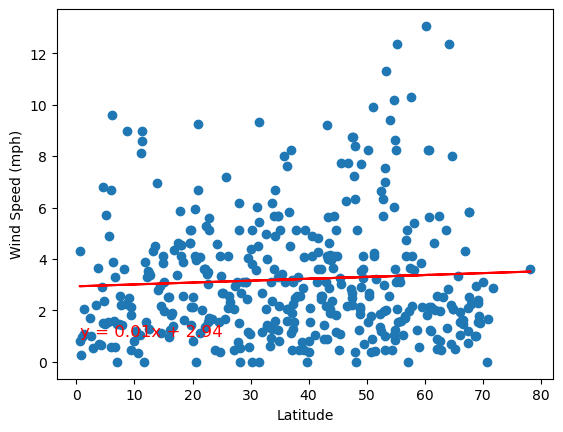

The r-value is: 0.0033756505559513167


In [39]:
# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the equation on the graph within the plot area
equation_text = f"{line_eq}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].min() + 1, equation_text, fontsize=12, color="red")

# Show the plot
plt.show()

# Output the r-value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

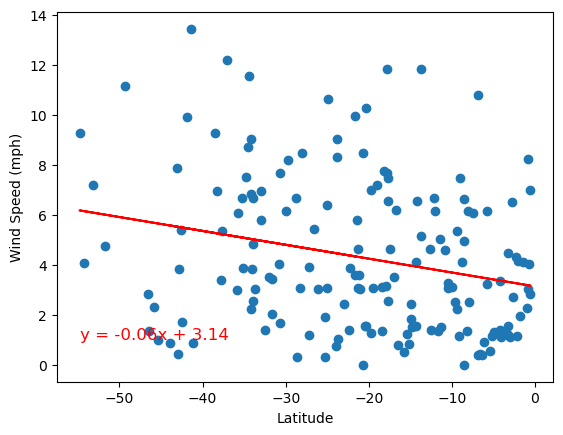

The r-value is: 0.06206668452639735


In [40]:
# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the equation on the graph within the plot area
equation_text = f"{line_eq}"
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].min() + 1, equation_text, fontsize=12, color="red")

# Show the plot
plt.show()

# Output the r-value
r_squared = rvalue ** 2
print(f"The r-value is: {r_squared}")
